## CNN for ASL Image Classification

**Importing Libraries**

In [5]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split,DataLoader
import torch.optim as optim

**Data Loading**

In [6]:
# setting file path
train_filepath = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

# defining transforms
train_transforms = transforms.Compose([
    transforms.ToTensor()
])

#Data Loading 
train_dataset = datasets.ImageFolder(train_filepath, transform=train_transforms)
print("Train Dataset Info:\n",train_dataset)

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=64, 
                                               shuffle=True,
                                               num_workers=4)

Train Dataset Info:
 Dataset ImageFolder
    Number of datapoints: 87000
    Root location: ../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


**Check Device**

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

**Initialization of Hyperparameters**

#### **CNN 1 Convolution Layer**

*** Kernel size = 5**<br>
*** Loss Function = CrossEntropy**<br>
*** Optimizer = Adam**


In [8]:
#creating 1 Layer Architecture
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.NN = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2)
        )

        self.predict = nn.Sequential(
            nn.Linear(16*100*100,100),
            nn.Dropout(0.2),
            nn.BatchNorm1d(100),
            nn.Dropout(0.2),
            nn.Linear(100,29),
            nn.Softmax(dim=1)
        )
    
    def forward(self,x):
        x = self.NN(x)
        x = x.view(-1,16*100*100)
        return self.predict(x)

In [9]:
#creating a model 
model = NN()

if torch.cuda.is_available():
    model.cuda()
    
model

NN(
  (NN): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (predict): Sequential(
    (0): Linear(in_features=160000, out_features=100, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=100, out_features=29, bias=True)
    (5): Softmax(dim=1)
  )
)

In [11]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

In [12]:
num_epochs = 5
acc_list = []
loss_list = []
for epoch in range(num_epochs):
    correct = 0
    for batch_idx , (data,labels) in enumerate(train_dataloader):
        data = data.to(device=device)
        labels = labels.to(device= device)
        data, labels = data.cuda(), labels.cuda()
        
        #forward
        scores = model(data)
        loss = criterion(scores, labels)

        #backprop
        optimizer.zero_grad()
        loss.backward()

        #gradient descent
        optimizer.step()

        #performance
        prediction = torch.max(scores,1)[1]
    
        correct += (prediction == labels).cpu().sum().numpy()
    acc_list.append(correct/len(train_dataloader.dataset))
    loss_list.append(loss.data)
    print("Epoch :",epoch,"\tLoss :",loss.data,"\tAccuracy :",(correct/len(train_dataloader.dataset))*100)  

Epoch : 0 	Loss : tensor(2.7382, device='cuda:0') 	Accuracy : 54.58045977011494
Epoch : 1 	Loss : tensor(2.4370, device='cuda:0') 	Accuracy : 83.34252873563219
Epoch : 2 	Loss : tensor(2.5725, device='cuda:0') 	Accuracy : 90.03793103448275
Epoch : 3 	Loss : tensor(2.4999, device='cuda:0') 	Accuracy : 92.67816091954023
Epoch : 4 	Loss : tensor(2.5102, device='cuda:0') 	Accuracy : 94.04712643678161


**Plotting Accuracy and Loss while training**


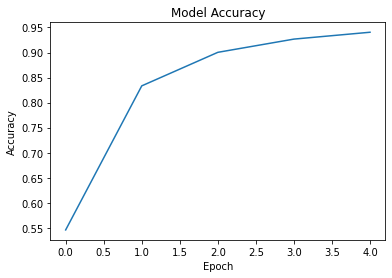

In [13]:
plt.plot(acc_list)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

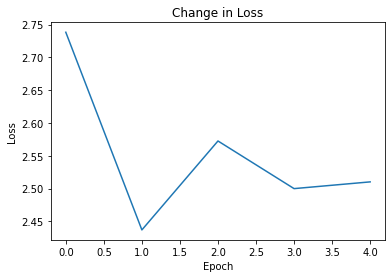

In [14]:
loss_val_list=[]
for i in range(len(loss_list)):
    loss_val_list.append(loss_list[i].cpu().detach().numpy())
    
plt.plot(loss_val_list)
plt.title('Change in Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

*** Kernel size = 3**<br>
*** Loss Function = CrossEntropy**<br>
*** Optimizer = Adam**

In [15]:
#creating 1 Layer Architecture
class NN1(nn.Module):
    def __init__(self):
        super(NN1,self).__init__()
        self.NN1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,stride=1,padding='same'),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2)
        )

        self.predict = nn.Sequential(
            nn.Linear(16*100*100,100),
            nn.Dropout(0.2),
            nn.BatchNorm1d(100),
            nn.Dropout(0.2),
            nn.Linear(100,29),
            nn.Softmax(dim=1)
        )
    
    def forward(self,x):
        x = self.NN1(x)
        x = x.view(-1,16*100*100)
        return self.predict(x)

**Initialization of Hyperparameters**

In [16]:
#creating a model 
model1 = NN1()

if torch.cuda.is_available():
    model1.cuda()
    
model1

NN1(
  (NN1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (predict): Sequential(
    (0): Linear(in_features=160000, out_features=100, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=100, out_features=29, bias=True)
    (5): Softmax(dim=1)
  )
)

In [17]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr= 0.001)

In [18]:
num_epochs = 5
acc_list1 = []
loss_list1 = []
for epoch in range(num_epochs):
    correct = 0
    for batch_idx , (data,labels) in enumerate(train_dataloader):
        data = data.to(device=device)
        labels = labels.to(device= device)
        data, labels = data.cuda(), labels.cuda()
        
        #forward
        scores = model1(data)
        loss = criterion(scores, labels)

        #backprop
        optimizer.zero_grad()
        loss.backward()

        #gradient descent
        optimizer.step()

        #performance
        prediction = torch.max(scores,1)[1]
    
        correct += (prediction == labels).cpu().sum().numpy()
    acc_list1.append(correct/len(train_dataloader.dataset))
    loss_list1.append(loss.data)
    print("Epoch :",epoch,"\tLoss :",loss.data,"\tAccuracy :",(correct/len(train_dataloader.dataset))*100)  

Epoch : 0 	Loss : tensor(2.6520, device='cuda:0') 	Accuracy : 55.140229885057465
Epoch : 1 	Loss : tensor(2.5776, device='cuda:0') 	Accuracy : 83.15172413793104
Epoch : 2 	Loss : tensor(2.5553, device='cuda:0') 	Accuracy : 89.78390804597701
Epoch : 3 	Loss : tensor(2.6192, device='cuda:0') 	Accuracy : 92.60344827586206
Epoch : 4 	Loss : tensor(2.5243, device='cuda:0') 	Accuracy : 94.26436781609195


**Plotting Accuracy and Loss while training**


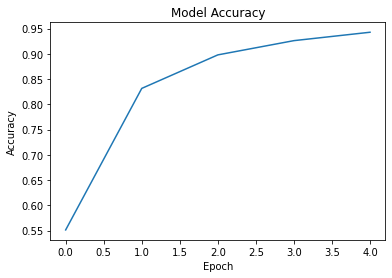

In [19]:
plt.plot(acc_list1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
loss_val_list1=[]
for i in range(len(loss_list1)):
    loss_val_list.append(loss_list1[i].cpu().detach().numpy())
    
plt.plot(loss_val_list1)
plt.title('Change in Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### **CNN 5 Convolution Layer**

*** Kernel size = 5**<br>
*** Loss Function = CrossEntropy**<br>
*** Optimizer = Adam**


In [21]:
class NN5(nn.Module):
    def __init__(self):
        super(NN5,self).__init__()
        self.NN5 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=5,stride=1,padding='same'),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            
            nn.Conv2d(16,32,kernel_size=5,stride=1,padding='same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(32,64,kernel_size=5,stride=1,padding='same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            
            nn.Conv2d(64,128,kernel_size=5,stride=1,padding='same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            
            nn.Conv2d(128,256,kernel_size=5,stride=1,padding='same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2)
        )

        self.predict = nn.Sequential(
            nn.Linear(256*25*25,200),
            nn.Dropout(0.5),
            nn.BatchNorm1d(200),
            nn.Dropout(0.5),
            nn.Linear(200,29),
            nn.Softmax(dim=1)
        )
    
    def forward(self,x):
        x = self.NN5(x)
        x = x.view(-1,256*25*25)
        return self.predict(x)

In [22]:
#creating a model 
model5 = NN5()

if torch.cuda.is_available():
    model5.cuda()
    
model5

NN5(
  (NN5): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=same)
   

In [23]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model5.parameters(), lr= 0.001)

In [24]:
num_epochs = 5
acc_list5 = []
loss_list5 = []
for epoch in range(num_epochs):
    correct = 0
    for batch_idx , (data,labels) in enumerate(train_dataloader):
        data = data.to(device=device)
        labels = labels.to(device= device)
        data, labels = data.cuda(), labels.cuda()
        
        #forward
        scores = model5(data)
        loss = criterion(scores, labels)

        #backprop
        optimizer.zero_grad()
        loss.backward()

        #gradient descent
        optimizer.step()

        #performance
        prediction = torch.max(scores,1)[1]
    
        correct += (prediction == labels).cpu().sum().numpy()
    acc_list5.append(correct/len(train_dataloader.dataset))
    loss_list5.append(loss.data)
    print("Epoch :",epoch,"\tLoss :",loss.data,"\tAccuracy :",(correct/len(train_dataloader.dataset))*100)  

Epoch : 0 	Loss : tensor(2.5269, device='cuda:0') 	Accuracy : 58.90804597701149
Epoch : 1 	Loss : tensor(2.4681, device='cuda:0') 	Accuracy : 90.4183908045977
Epoch : 2 	Loss : tensor(2.4478, device='cuda:0') 	Accuracy : 94.20229885057472
Epoch : 3 	Loss : tensor(2.5040, device='cuda:0') 	Accuracy : 95.10229885057471
Epoch : 4 	Loss : tensor(2.4861, device='cuda:0') 	Accuracy : 95.59080459770115


**Plotting Accuracy and Loss while training**


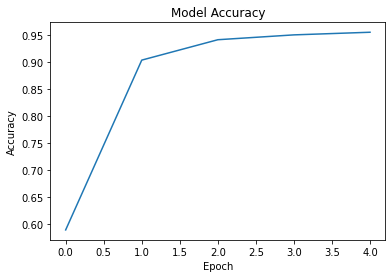

In [25]:
plt.plot(acc_list5)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

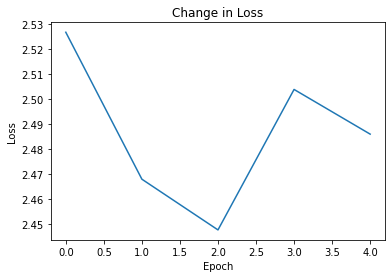

In [26]:
loss_val_list5=[]
for i in range(len(loss_list5)):
    loss_val_list5.append(loss_list5[i].cpu().detach().numpy())
    
plt.plot(loss_val_list5)
plt.title('Change in Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

*** Kernel size = 3**<br>
*** Loss Function = CrossEntropy**<br>
*** Optimizer = Adam**

In [27]:
class NN51(nn.Module):
    def __init__(self):
        super(NN51,self).__init__()
        self.NN51 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,stride=1,padding='same'),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            
            nn.Conv2d(16,32,kernel_size=3,stride=1,padding='same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding='same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            
            nn.Conv2d(64,128,kernel_size=3,stride=1,padding='same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            
            nn.Conv2d(128,256,kernel_size=3,stride=1,padding='same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2)
        )

        self.predict = nn.Sequential(
            nn.Linear(256*25*25,200),
            nn.Dropout(0.5),
            nn.BatchNorm1d(200),
            nn.Dropout(0.5),
            nn.Linear(200,29),
            nn.Softmax(dim=1)
        )
    
    def forward(self,x):
        x = self.NN51(x)
        x = x.view(-1,256*25*25)
        return self.predict(x)

**Initialization of Hyperparameters**

In [28]:
#creating a model 
model51 = NN51()

if torch.cuda.is_available():
    model51.cuda()
    
model51

NN51(
  (NN51): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
 

In [29]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model51.parameters(), lr= 0.001)

In [30]:
num_epochs = 5
acc_list51 = []
loss_list51 = []
for epoch in range(num_epochs):
    correct = 0
    for batch_idx , (data,labels) in enumerate(train_dataloader):
        data = data.to(device=device)
        labels = labels.to(device= device)
        data, labels = data.cuda(), labels.cuda()
        
        #forward
        scores = model51(data)
        loss = criterion(scores, labels)

        #backprop
        optimizer.zero_grad()
        loss.backward()

        #gradient descent
        optimizer.step()

        #performance
        prediction = torch.max(scores,1)[1]
    
        correct += (prediction == labels).cpu().sum().numpy()
    acc_list51.append(correct/len(train_dataloader.dataset))
    loss_list51.append(loss.data)
    print("Epoch :",epoch,"\tLoss :",loss.data,"\tAccuracy :",(correct/len(train_dataloader.dataset))*100)  

Epoch : 0 	Loss : tensor(2.7117, device='cuda:0') 	Accuracy : 59.50919540229885
Epoch : 1 	Loss : tensor(2.5127, device='cuda:0') 	Accuracy : 89.49080459770114
Epoch : 2 	Loss : tensor(2.5582, device='cuda:0') 	Accuracy : 96.19425287356322
Epoch : 3 	Loss : tensor(2.5207, device='cuda:0') 	Accuracy : 97.71724137931035
Epoch : 4 	Loss : tensor(2.4724, device='cuda:0') 	Accuracy : 98.33218390804598


**Plotting Accuracy and Loss while training**


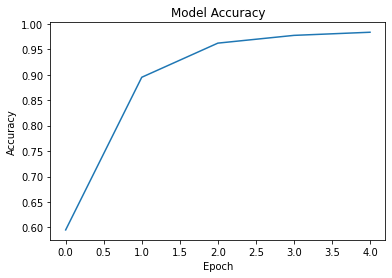

In [31]:
plt.plot(acc_list51)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
loss_val_list51=[]
for i in range(len(loss_list51)):
    loss_val_list5.append(loss_list51[i].cpu().detach().numpy())
    
plt.plot(loss_val_list51)
plt.title('Change in Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()